In [0]:


import warnings
warnings.filterwarnings(action="ignore")



In [0]:
import time
import numpy as np
import pandas as pd
import io


from collections import Counter

import seaborn as sns
from matplotlib import pylab as plt

sns.set_style("whitegrid")
sns.set_context("talk")

In [0]:
plt.rcParams["figure.figsize"] = (18, 8)

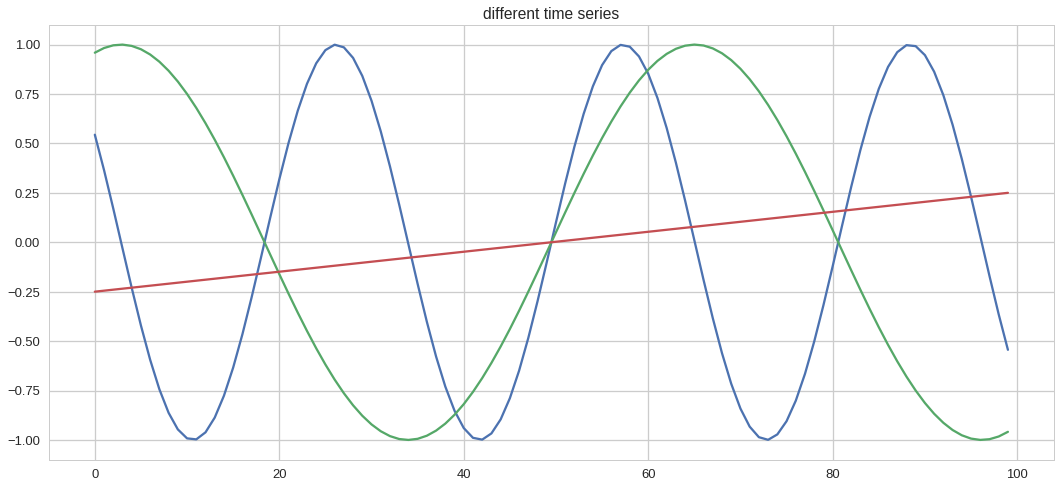

In [5]:


ts1 = np.sin(np.linspace(-10, 10, 100))
ts2 = np.sin(0.5*np.linspace(-10, 10, 100))
ts3 = 0.5*np.linspace(-10, 10, 100)/20
plt.plot(ts1)
plt.plot(ts2)
plt.plot(ts3)
plt.title("different time series")
plt.savefig("some_time_series.png")
plt.show()



In [6]:
def euclidian_distance(ts1, ts2):
    return np.linalg.norm(ts1-ts2)

print("Distance between time series 1 & 2:\t {:.2f}".format(euclidian_distance(ts1, ts2)))
print("Distance between time series 1 & 3:\t {:.2f}".format(euclidian_distance(ts1, ts3)))

Distance between time series 1 & 2:	 11.08
Distance between time series 1 & 3:	 6.79


In [0]:
def compute_accumulated_cost_matrix(A, B, matrix):
    """
    Computes the DTW accumulated cost matrix between
    two time series A and B of the same size.
    """
    assert len(A) == len(B)
    
    n = len(A)
    
    matrix[0, 1:] = np.inf
    matrix[1:, 0] = np.inf
    actual_matrix = matrix[1:, 1:]

    for i in range(n):
        for j in range(n):
            actual_matrix[i, j] = (A[i]- B[j])**2

    for i in range(n):
        for j in range(n):
            actual_matrix[i, j] += min(
                matrix[i, j],
                matrix[i, j+1],
                matrix[i+1, j]
            )

    return actual_matrix

def DTW_distance(ts1, ts2):
    zeros = np.zeros((len(ts1) + 1, len(ts2) + 1))
    M = compute_accumulated_cost_matrix(ts1, ts2, zeros)
    distance = M[-1, -1] / sum(M.shape)
    return distance

In [9]:


%%timeit -n 1000
distance = DTW_distance(ts1, ts2)



1000 loops, best of 3: 15.6 ms per loop


In [10]:
print("Distance between time series 1 & 2:\t {:.2f}".format(DTW_distance(ts1, ts2)))
print("Distance between time series 1 & 3:\t {:.2f}".format(DTW_distance(ts1, ts3)))

Distance between time series 1 & 2:	 0.17
Distance between time series 1 & 3:	 0.21


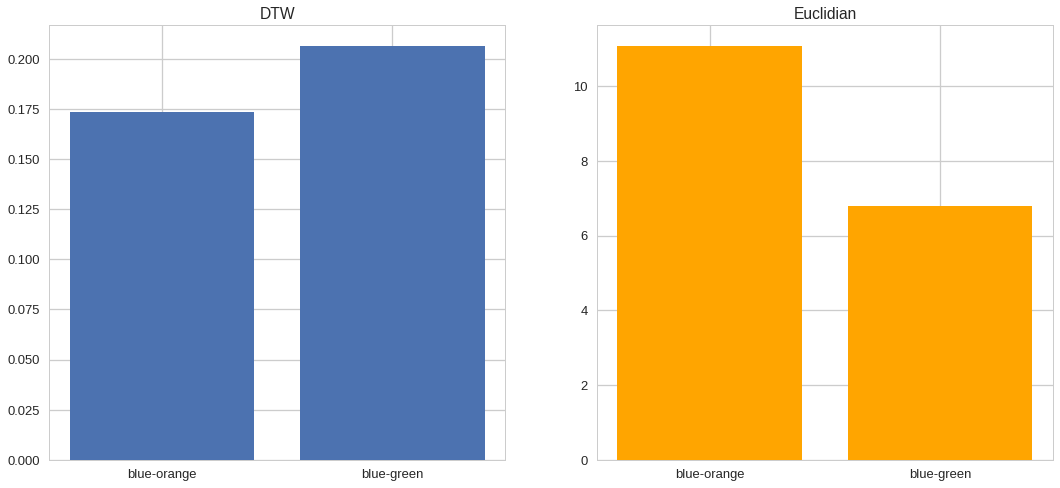

In [11]:
plt.subplot(121)
plt.title("DTW")
plt.bar(np.arange(2), [DTW_distance(ts1, ts2), DTW_distance(ts1, ts3)])
plt.xticks(np.arange(2), ["blue-orange", "blue-green"])
plt.subplot(122)
plt.title("Euclidian")
plt.bar(np.arange(2), [euclidian_distance(ts1, ts2), euclidian_distance(ts1, ts3)], color="orange")
plt.xticks(np.arange(2), ["blue-orange", "blue-green"])
plt.savefig("barplot.png")
plt.show()

In [0]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score



In [26]:
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
df.index = df.pop("Unnamed: 0")

df = df.sample(n=100)

y = df.pop("y").values
X = df.values

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (100, 178)
Target shape: (100,)


In [15]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [21]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
X12.V1.16,-20,-11,2,19,24,18,21,19,20,31,...,-5,-8,-13,-14,0,5,-7,-24,-26,-15
X19.V1.66,31,20,11,-14,-34,-36,-16,11,21,39,...,-92,-102,-110,-105,-87,-63,-58,-55,-54,-57
X15.V1.50,18,5,-3,12,14,10,-13,-26,-26,-34,...,-45,-39,-28,-9,1,-3,-2,-6,-4,11
X1.V1.114,60,47,38,29,28,30,28,30,36,51,...,20,18,17,25,27,24,18,14,16,22
X17.V1.554,15,18,29,29,31,30,32,30,25,27,...,30,33,33,29,31,28,23,21,23,21


In [0]:
df=df.sample(frac=0.1)

In [0]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
X17.V1.18,18,9,-8,-24,-35,-33,-35,-30,-27,-26,...,8,-2,-6,-20,-33,-40,-40,-35,-28,5
X3.V1.912,-1,3,-1,2,3,-3,-3,-4,0,0,...,30,27,20,10,5,1,-10,-13,-12,3
X23.V1.224,135,134,136,139,142,145,147,147,148,150,...,-98,-173,-267,-431,-556,-645,-662,-648,-569,1
X20.V1.153,15,1,-5,-2,-12,-11,-2,3,13,30,...,-63,-57,-35,-17,-2,-6,-7,-13,-5,2
X9.V1.794,435,196,-129,-478,-776,-953,-967,-866,-722,-592,...,-968,-824,-648,-482,-333,-206,-86,15,106,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, X15.V1.931 to X9.V1.592
Columns: 178 entries, X1 to X178
dtypes: int64(178)
memory usage: 419.5+ KB


In [27]:
print("Target values count:\n====================")
for v, c in sorted(Counter(y).items()):
    print(v, ":", c)

Target values count:
1 : 21
2 : 21
3 : 20
4 : 17
5 : 21


In [28]:
for split in range(3):
    
    print("=================\n")
    print(f"Random split n° {split+1}\n")
    print("=================\n")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    print("Number of training samples:", X_train.shape[0])
    print("Number of test samples:", X_test.shape[0])

    print()

    print("### Using the euclidian distance\n")
    
    model = KNeighborsClassifier(metric=euclidian_distance, n_neighbors=3)

    t = time.time()
    model.fit(X_train, y_train)
    print("Training time: {:.2f} seconds".format(time.time()-t))

    t = time.time()
    pred_euclidian = model.predict(X_test)
    print("Prediction time: {:.2f} seconds".format(time.time()-t))

    print()

    print(classification_report(y_true=y_test, y_pred=pred_euclidian))
    print("Accuracy: {:.2f}\n".format(accuracy_score(y_true=y_test, y_pred=pred_euclidian)))
    
    print("### Using the DTW distance\n")
    
    model = KNeighborsClassifier(metric=DTW_distance, n_neighbors=3)

    t = time.time()
    model.fit(X_train, y_train)
    print("Training time: {:.2f} seconds".format(time.time()-t))

    t = time.time()
    pred_DTW = model.predict(X_test)
    print("Prediction time: {:.2f} seconds".format(time.time()-t))

    print()

    print(classification_report(y_true=y_test, y_pred=pred_DTW))
    print("Accuracy: {:.2f}\n".format(accuracy_score(y_true=y_test, y_pred=pred_DTW)))


Random split n° 1


Number of training samples: 70
Number of test samples: 30

### Using the euclidian distance

Training time: 0.00 seconds
Prediction time: 0.02 seconds

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         6
          2       0.33      0.50      0.40         6
          3       0.22      0.80      0.35         5
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         8

avg / total       0.10      0.23      0.14        30

Accuracy: 0.23

### Using the DTW distance

Training time: 6.82 seconds
Prediction time: 106.71 seconds

             precision    recall  f1-score   support

          1       1.00      0.67      0.80         6
          2       0.17      0.17      0.17         6
          3       0.60      0.60      0.60         5
          4       0.50      0.40      0.44         5
          5       0.45      0.62      0.53         8

avg / total       0.54      

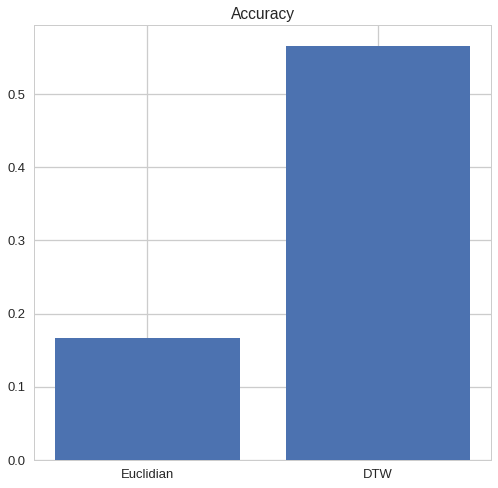

In [33]:
plt.subplot(121)
plt.title("Accuracy")
plt.bar(np.arange(2),
        [accuracy_score(y_test, pred_euclidian),
         accuracy_score(y_test, pred_DTW)])
plt.xticks(np.arange(2), ["Euclidian", "DTW"])


plt.savefig("kNN_perfs.png")
plt.show()

In [34]:
df = pd.read_csv("data.csv")
df.index = df.pop("Unnamed: 0")

df = df.sample(n=100)

y = df.pop("y").values
X = df.values

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (100, 178)
Target shape: (100,)


In [36]:
distance_matrix = np.zeros((100, 100))

t = time.time()

for i in range(100):
    for j in range(100):
        distance_matrix[i, j] = DTW_distance(X[i, :], X[j, :])

print("Elapsed time: {:.2f} seconds".format(time.time()-t))


Elapsed time: 477.94 seconds


In [0]:
from sklearn.manifold import MDS, TSNE, Isomap

n_components = 2
current_palette = sns.color_palette()

embedding_algorithms = [
    ("MMDS", MDS(n_components)),
    ("t-SNE", TSNE(n_components)),
    ("Isomap", Isomap(n_neighbors=3, n_components=2))
]

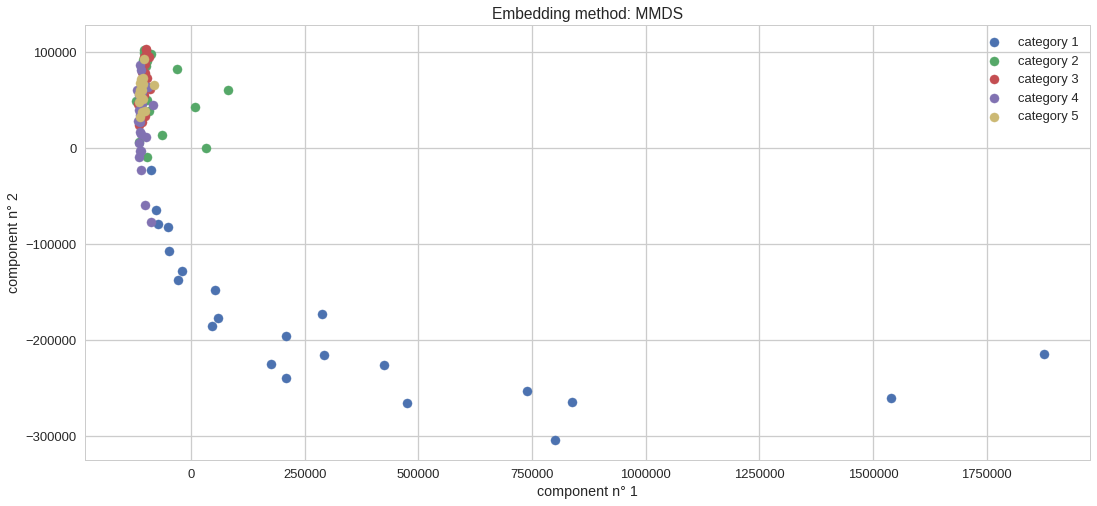

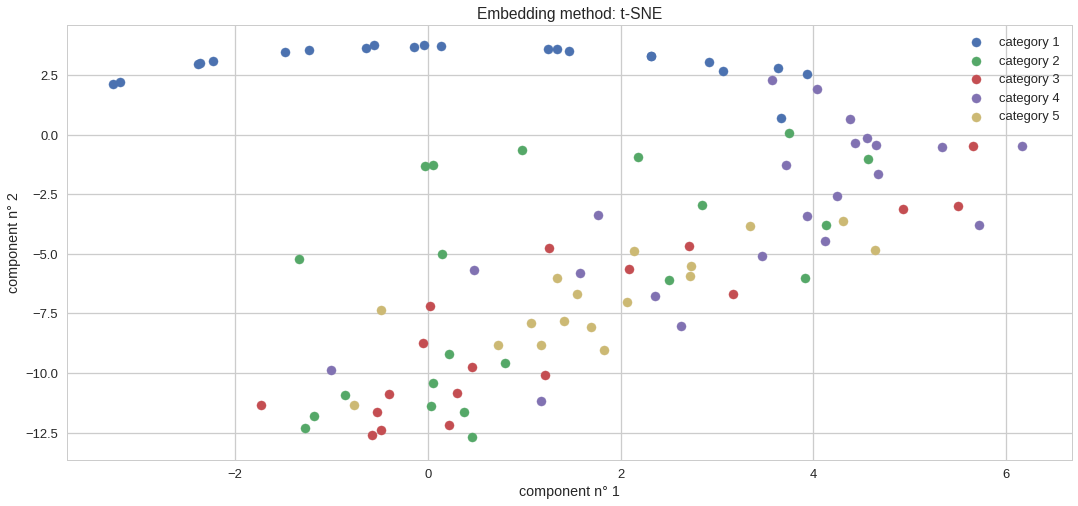

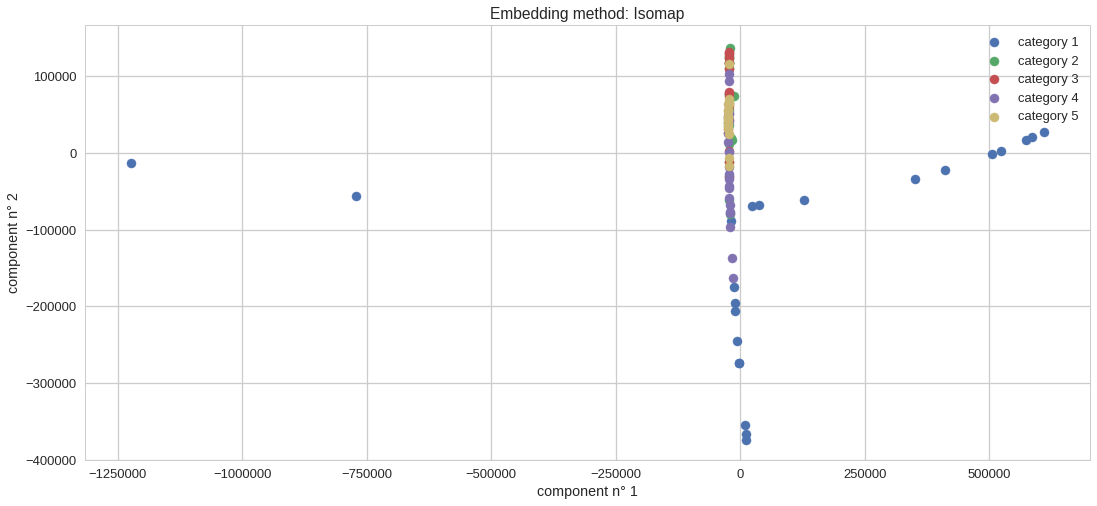

In [38]:
for name, model in embedding_algorithms:

    embedding = model.fit_transform(distance_matrix)

    plt.figure()
    plt.title(f"Embedding method: {name}")
    for v in sorted(set(y)):
        plt.scatter(embedding[y==v, 0], embedding[y==v, 1],
                    c=current_palette[v-1], label=f"category {v}")
    plt.xlabel("component n° 1")
    plt.ylabel("component n° 2")
    plt.legend()
    plt.savefig(f"{name}.png")
    plt.show()